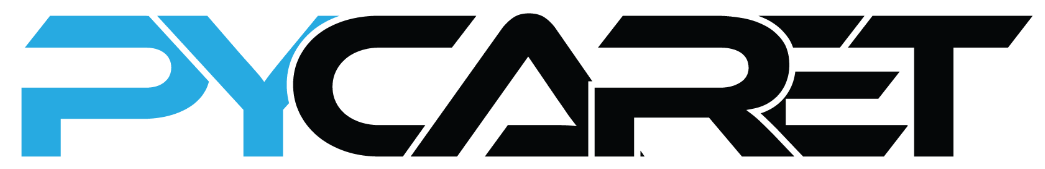
  
# <b>1- <span style='color:#F76241'></span> INTRODUCTION TO A LOW CODE LIBRARY</b>
## 



<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.1  What is PyCaret and Why Should you Use it?</b></p>
</div>

- PyCaret is an open-source, low-code machine learning library in Python that aims to reduce the cycle time from hypothesis to insights. It is well suited for seasoned data scientists who want to increase the productivity of their ML experiments by using PyCaret in their workflows or for citizen data scientists and those new to data science with little or no background in coding.</code>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.2  WHAT TASKS ARE COVERED?</b></p>
</div>

- Defining the data transforms to perform (setup())
- Evaluating and comparing standard models (compare_models())
- Tuning model hyperparameters (tune_model())


<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.3  NOTEBOOK GOAL</b></p>
</div>

- This notebook Goal is:
 - Introduction to various commands of pycaret library.
 - Implementayion of this library for regression.
 
 
 We will not explore all of the features of the library in this notebook; instead, we   will focus on simple machine learning model comparison and hyperparameter tuning.



In [ ]:
!pip install pycaret==2.3

In [ ]:
!pip install sweetviz

 # <b>2- <span style='color:#F76241'></span> IMPORT LIBRARIES AND DATA</b>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pycaret
import sweetviz as sv
from pycaret.utils import version
from pycaret.datasets import get_data
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [ ]:
print('Using PyCaret Version', pycaret.__version__)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.1  LOADING DATA</b></p>
</div>

### There are two ways to register your data into PyCaret:
- Loading a Dataframe with Pandas
- Using the Data Repository of Pycaret : data = get_data('data name')

I choose second method

In [ ]:
# The repository contained 56 datasets that you can choose
all_datasets = pycaret.datasets.get_data('index')

#### I choosed insurance dataset (number 53)
# 

In [ ]:
# The repository contained 56 datasets that you can choose
data =get_data('insurance')

In [ ]:
data.head().style.set_properties(**{'background-color': '#CDC8B1' ,'color':'black','border-color': '#8b8c8c'})

# <b>3- <span style='color:#F76241'></span> 👉 A SHORT EDA BY SWEETVIZ AND PLOTLY</b>



In [ ]:
# Analyse Dataset
report = sv.analyze(data)

In [ ]:
report.show_html()

In [ ]:
report.show_notebook(w="100%", h="full")

In [ ]:
data.head()

In [ ]:
fig = px.scatter_3d(data, x='age', y='charges', z='bmi',
              color='sex'
                   ,title=f'3d scatter based on Age, charges, bmi and sex')
fig.show()

# <b>4- <span style='color:#F76241'></span> INITIALIZE SETUP & MODEL TRAINING</b>

In [ ]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges',session_id=123) 

# <b>5- <span style='color:#F76241'></span> SELECT BEST MODEL</b>

In [ ]:
best_model = compare_models(fold=5)

In [ ]:
best_model

# <b>6- <span style='color:#F76241'></span> CREATE MODEL</b>

In [ ]:
gbr = create_model('gbr')

# <b>7- <span style='color:#F76241'></span> TUNE HYPERPARAMETERS</b>

In [ ]:
tuned_gbr = tune_model(gbr, n_iter=50, optimize = 'MAE')

In [ ]:
tuned_gbr

# <b>8- <span style='color:#F76241'></span>ENSEMBLE MODEL</b>

In [ ]:
dt = create_model('dt')

In [ ]:
bagged_dt = ensemble_model(dt, n_estimators=50)

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

# <b>9- <span style='color:#F76241'></span>ANALYZE MODEL</b>

In [ ]:
plot_model(tuned_gbr)

In [ ]:
plot_model(dt)

In [ ]:
plot_model(tuned_gbr, plot = 'error')

In [ ]:
plot_model(dt, plot = 'error')

In [ ]:
plot_model(tuned_gbr, plot = 'feature')

In [ ]:
plot_model(dt, plot = 'feature')

# <b>10- <span style='color:#F76241'></span>INTERPRET MODEL</b>

In [ ]:
interpret_model(dt)

# <b>11- <span style='color:#F76241'></span>PREDICT MODEL</b>

In [ ]:
pred_holdouts = predict_model(gbr)
pred_holdouts.head()


In [ ]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best_model, data=new_data)
predict_new.head()

# <b>12- <span style='color:#F76241'></span>SAVE AND LOAD MODEL</b>

In [ ]:
save_model(best_model, model_name='best-model')